# **WORLD HAPPINESS REPORT**

The following dataset has been downloaded from [kaggle](https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2017.csv), which contains the World Happiness Reports for the years 2015,2016 and 2017.

In [ ]:
from google.colab import files
files.upload()

Importing python modules:

In [122]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Loading the files:

In [4]:
data2015 = pd.read_csv('/content/2015.csv')
data2017 = pd.read_csv('/content/2017.csv')
data2016 = pd.read_csv('/content/2016.csv')

# EXPLORATORY DATA ANALYSIS

In [5]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
data2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [94]:
print("2015 Dataset Dimensions:",data2015.shape)
print("2017 Dataset Dimensions:",data2017.shape)
print("2016 Dataset Dimensions:",data2016.shape)

2015 Dataset Dimensions: (158, 12)
2017 Dataset Dimensions: (155, 12)
2016 Dataset Dimensions: (157, 13)


In [98]:
print("2015 Dataset Columns:\n",data2015.columns,"\n\n")
print("2017 Dataset Columns:\n",data2017.columns,"\n\n")
print("2016 Dataset Columns:\n",data2016.columns,"\n")

2015 Dataset Columns:
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 


2017 Dataset Columns:
 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 


2016 Dataset Columns:
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 



In [10]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
data2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [111]:
corr2015=data2015.corr()
corr2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.098804,-0.015756,0.040092,0.137555,0.020416,0.075142,0.027665,0.125607,0.004352
Region,0.005092,1.000000,0.213773,-0.213092,-0.075608,-0.202232,-0.130799,-0.252783,0.109638,0.210766,0.311754,-0.049227
Happiness Rank,-0.098538,0.213773,1.000000,-0.999985,0.216297,-0.795722,-0.770006,-0.757343,-0.576229,-0.301309,-0.172318,-0.532454
Happiness Score,0.098804,-0.213092,-0.999985,1.000000,-0.215899,0.795699,0.770159,0.757635,0.576458,0.301363,0.172684,0.532728
Standard Error,-0.015756,-0.075608,0.216297,-0.215899,1.000000,-0.221022,-0.213507,-0.292562,-0.186546,-0.145559,-0.113162,-0.021932
Economy (GDP per Capita),0.040092,-0.202232,-0.795722,0.795699,-0.221022,1.000000,0.681042,0.847213,0.415421,0.226086,0.012482,0.077430
Family,0.137555,-0.130799,-0.770006,0.770159,-0.213507,0.681042,1.000000,0.585628,0.528139,0.183678,0.146399,0.190534
Health (Life Expectancy),0.020416,-0.252783,-0.757343,0.757635,-0.292562,0.847213,0.585628,1.000000,0.399887,0.166859,0.110054,0.078649
Freedom,0.075142,0.109638,-0.576229,0.576458,-0.186546,0.415421,0.528139,0.399887,1.000000,0.462596,0.418458,0.095441
Trust (Government Corruption),0.027665,0.210766,-0.301309,0.301363,-0.145559,0.226086,0.183678,0.166859,0.462596,1.000000,0.212320,0.054891


In [112]:
corr2016=data2016.corr()
corr2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.029019,-0.031925,0.032307,0.028259,0.032614,0.016767,0.111142,-0.011665,0.082440,0.029796,0.122948,-0.031028
Region,0.029019,1.000000,0.213362,-0.216201,-0.208192,-0.212336,-0.182026,-0.160497,-0.236574,0.142643,0.217923,0.279257,-0.129924
Happiness Rank,-0.031925,0.213362,1.000000,-0.999957,-0.999375,-0.999247,-0.808615,-0.762115,-0.771627,-0.562436,-0.311947,-0.149111,-0.571063
Happiness Score,0.032307,-0.216201,-0.999957,1.000000,0.999286,0.999202,0.808714,0.761790,0.772098,0.561575,0.310030,0.148206,0.570603
Lower Confidence Interval,0.028259,-0.208192,-0.999375,0.999286,1.000000,0.997799,0.809361,0.764574,0.774869,0.558282,0.313660,0.147577,0.570340
Upper Confidence Interval,0.032614,-0.212336,-0.999247,0.999202,0.997799,1.000000,0.806221,0.757528,0.766941,0.566086,0.313299,0.148255,0.575292
Economy (GDP per Capita),0.016767,-0.182026,-0.808615,0.808714,0.809361,0.806221,1.000000,0.698863,0.856419,0.397277,0.223739,0.000406,0.138633
Family,0.111142,-0.160497,-0.762115,0.761790,0.764574,0.757528,0.698863,1.000000,0.618736,0.508152,0.177271,0.120647,0.189957
Health (Life Expectancy),-0.011665,-0.236574,-0.771627,0.772098,0.774869,0.766941,0.856419,0.618736,1.000000,0.353495,0.168675,0.080368,0.154823
Freedom,0.082440,0.142643,-0.562436,0.561575,0.558282,0.566086,0.397277,0.508152,0.353495,1.000000,0.466470,0.400576,0.108110


In [113]:
corr2017=data2016.corr()
corr2017

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.029019,-0.031925,0.032307,0.028259,0.032614,0.016767,0.111142,-0.011665,0.082440,0.029796,0.122948,-0.031028
Region,0.029019,1.000000,0.213362,-0.216201,-0.208192,-0.212336,-0.182026,-0.160497,-0.236574,0.142643,0.217923,0.279257,-0.129924
Happiness Rank,-0.031925,0.213362,1.000000,-0.999957,-0.999375,-0.999247,-0.808615,-0.762115,-0.771627,-0.562436,-0.311947,-0.149111,-0.571063
Happiness Score,0.032307,-0.216201,-0.999957,1.000000,0.999286,0.999202,0.808714,0.761790,0.772098,0.561575,0.310030,0.148206,0.570603
Lower Confidence Interval,0.028259,-0.208192,-0.999375,0.999286,1.000000,0.997799,0.809361,0.764574,0.774869,0.558282,0.313660,0.147577,0.570340
Upper Confidence Interval,0.032614,-0.212336,-0.999247,0.999202,0.997799,1.000000,0.806221,0.757528,0.766941,0.566086,0.313299,0.148255,0.575292
Economy (GDP per Capita),0.016767,-0.182026,-0.808615,0.808714,0.809361,0.806221,1.000000,0.698863,0.856419,0.397277,0.223739,0.000406,0.138633
Family,0.111142,-0.160497,-0.762115,0.761790,0.764574,0.757528,0.698863,1.000000,0.618736,0.508152,0.177271,0.120647,0.189957
Health (Life Expectancy),-0.011665,-0.236574,-0.771627,0.772098,0.774869,0.766941,0.856419,0.618736,1.000000,0.353495,0.168675,0.080368,0.154823
Freedom,0.082440,0.142643,-0.562436,0.561575,0.558282,0.566086,0.397277,0.508152,0.353495,1.000000,0.466470,0.400576,0.108110


In [13]:
import matplotlib.pyplot as plt

To check for any missing values and relationships between entities, we use the missingno python library. 

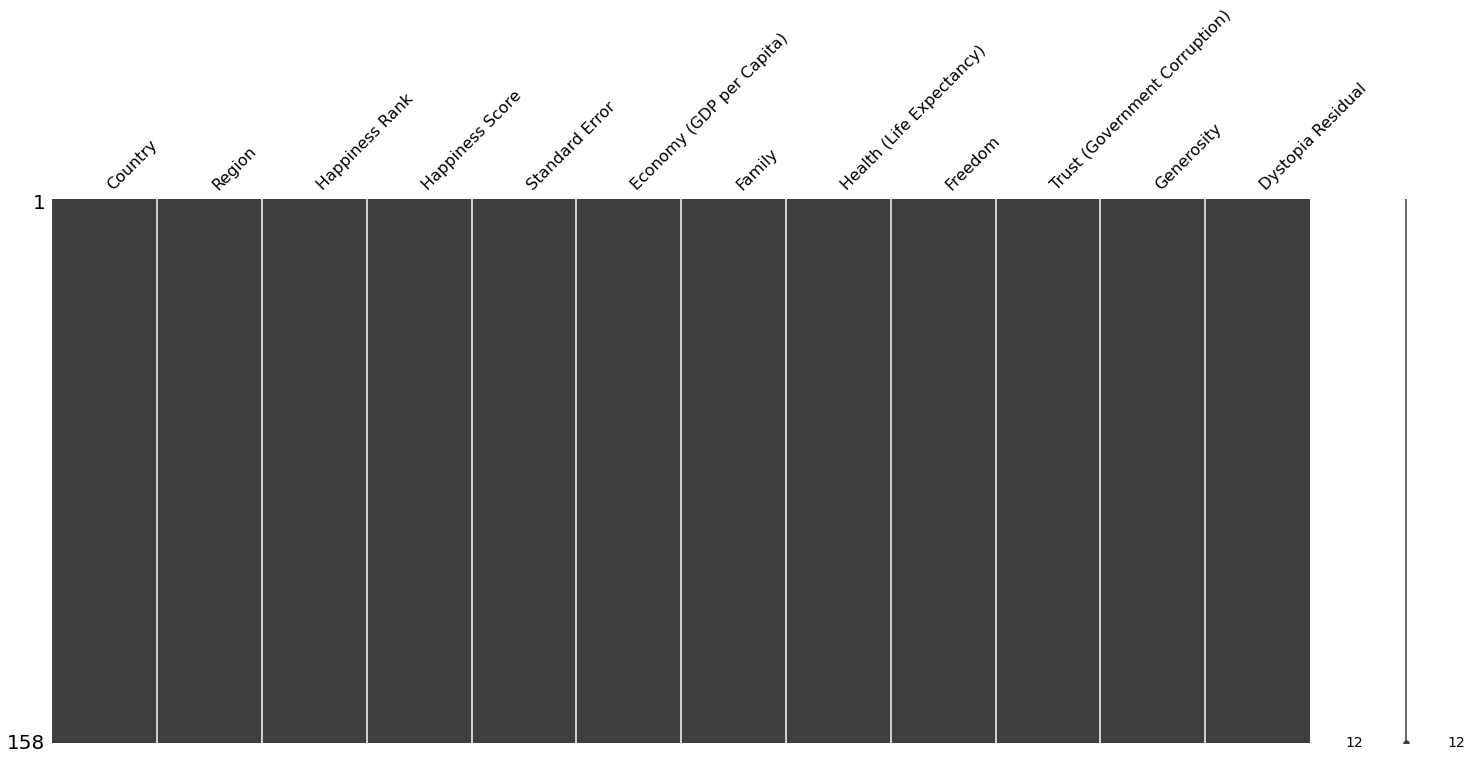

In [14]:
msno.matrix(data2015)

Therefore, we can conclude that our data has no missing values.

/usr/local/lib/python3.8/dist-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


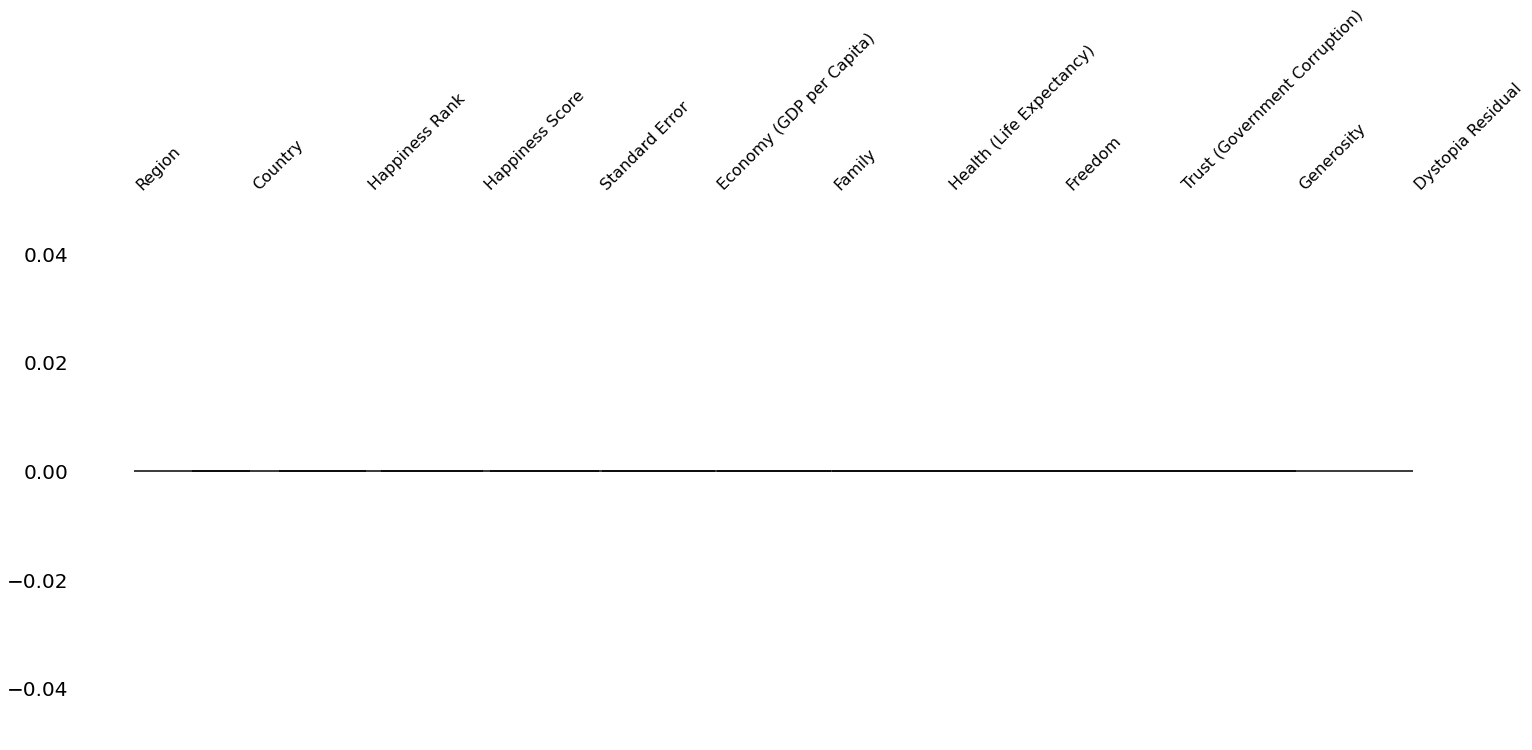

In [15]:
msno.dendrogram(data2015)

In [16]:
data2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

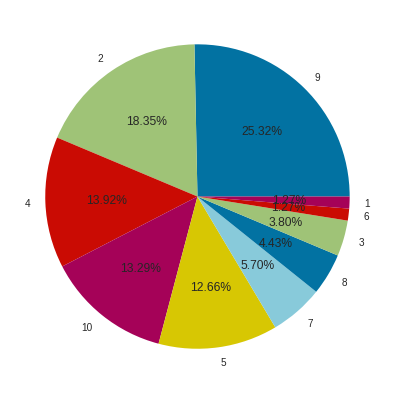

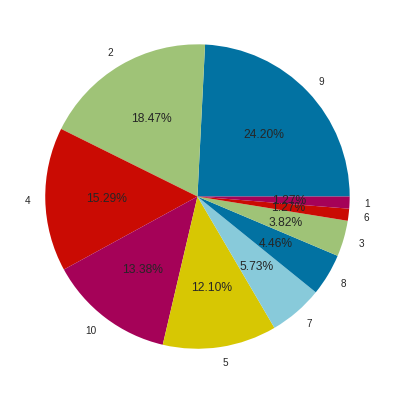

In [101]:
plt.figure(figsize=(14,7))
plt.pie(x=data2015['Region'].value_counts().values,
        labels=data2015['Region'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

plt.figure(figsize=(10,7))
plt.pie(x=data2016['Region'].value_counts().values,
        labels=data2016['Region'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

In [104]:
fig1 = px.histogram(data2015, x="Region", y="Happiness Rank", color="Region", marginal="rug", hover_data=data2015.columns)
fig2 = px.histogram(data2016, x="Region", y="Happiness Rank", color="Region", marginal="rug", hover_data=data2016.columns)
fig1.show()
fig2.show()

The Sub-saharan region has had the most countries with the highest Happiness Rank

<ipython-input-107-3566b054cdfe>:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f756d4d8820>,
      dtype=object)

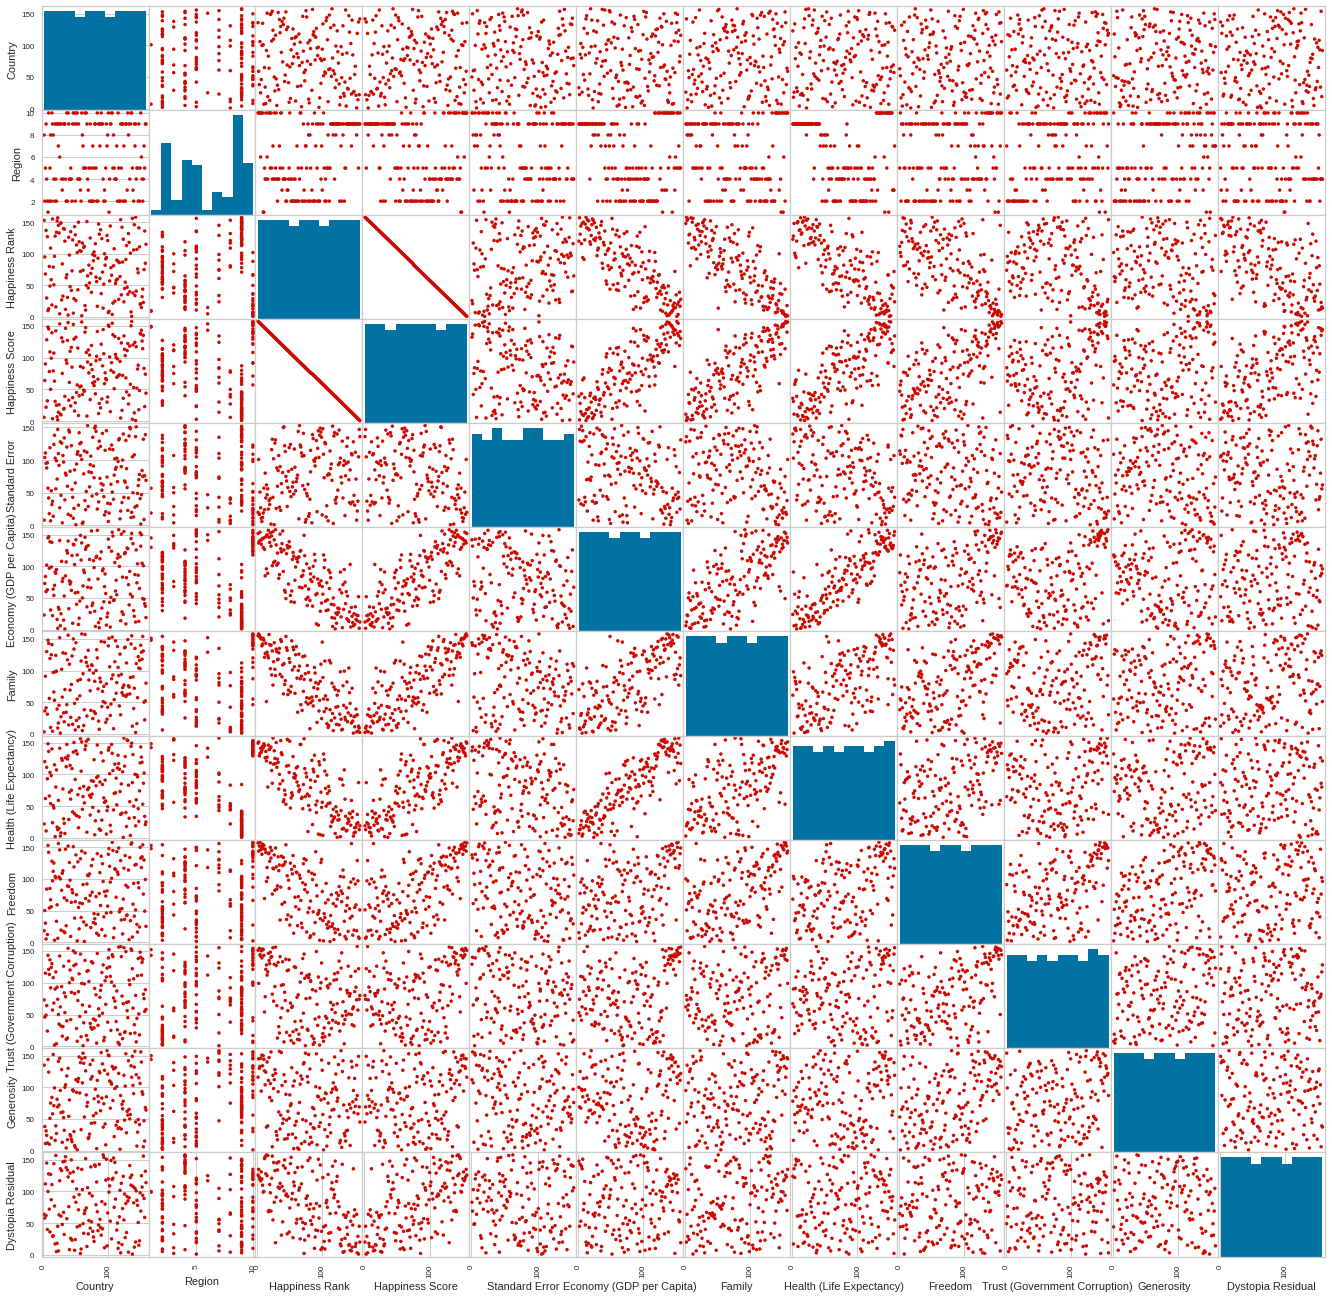

In [107]:
fig, ax = plt.subplots(figsize=(23,23))
scatter_matrix(data2015, alpha=1, ax=ax, color='r')

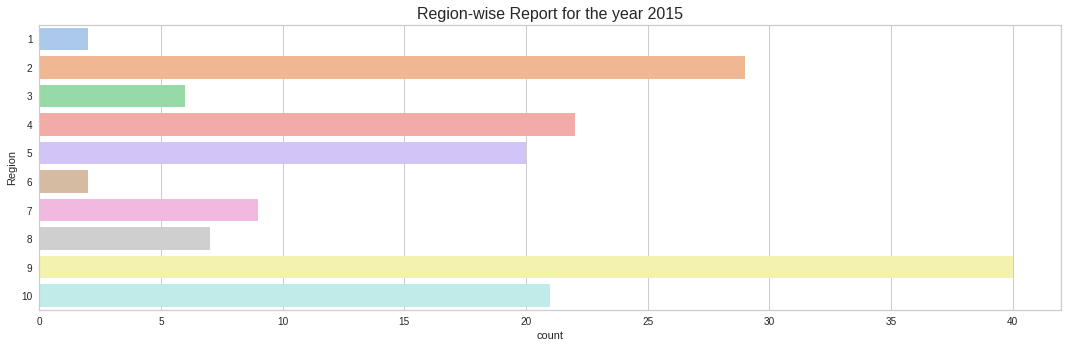

In [119]:
plt.figure(figsize=(15,5))
sns.countplot(data=data2015, y='Region', palette = 'pastel')
plt.title('Region-wise Report for the year 2015', fontsize=16)
plt.tight_layout()

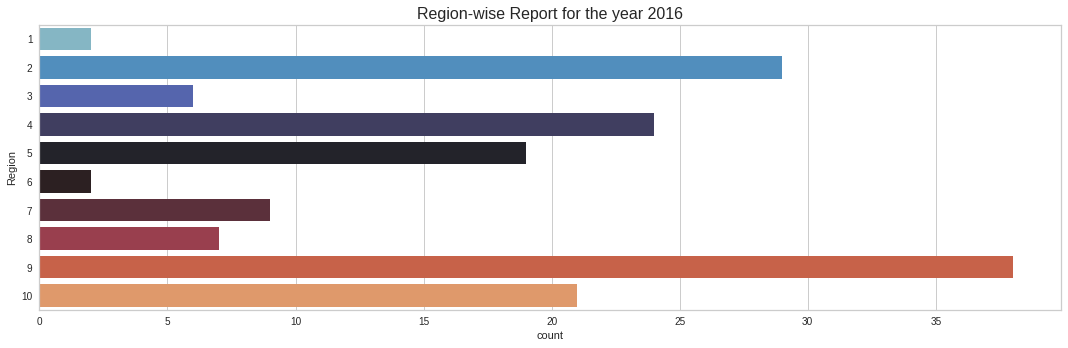

In [120]:
plt.figure(figsize=(15,5))
sns.countplot(data=data2016, y='Region', palette = 'icefire')
plt.title('Region-wise Report for the year 2016', fontsize=16)
plt.tight_layout()

In [31]:
data2015.describe(include='object')

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


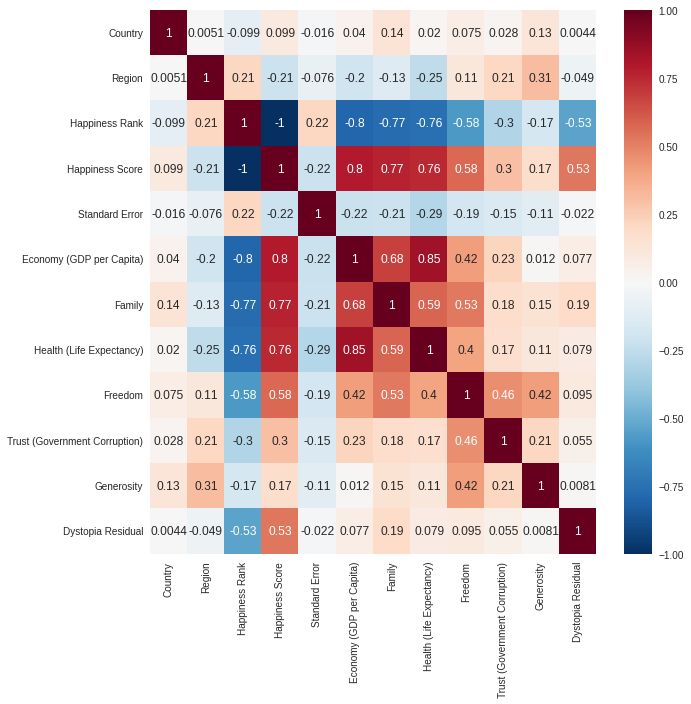

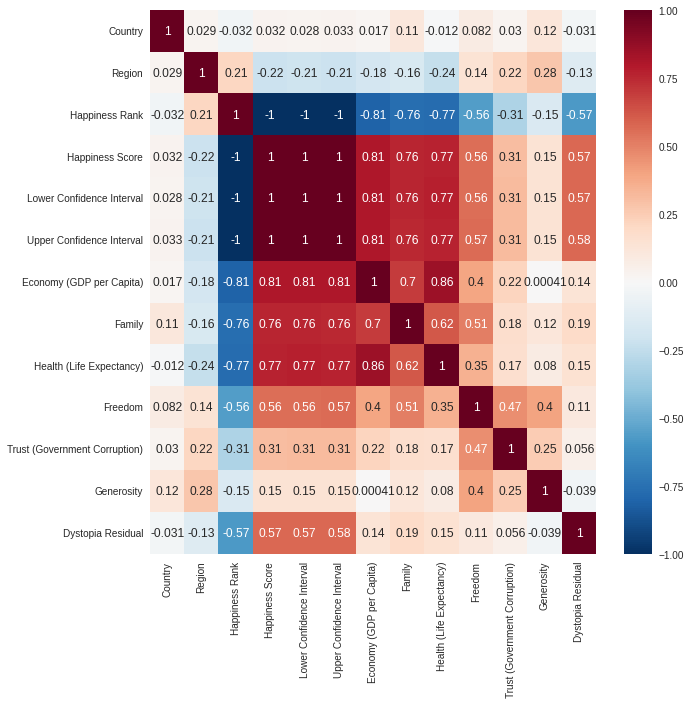

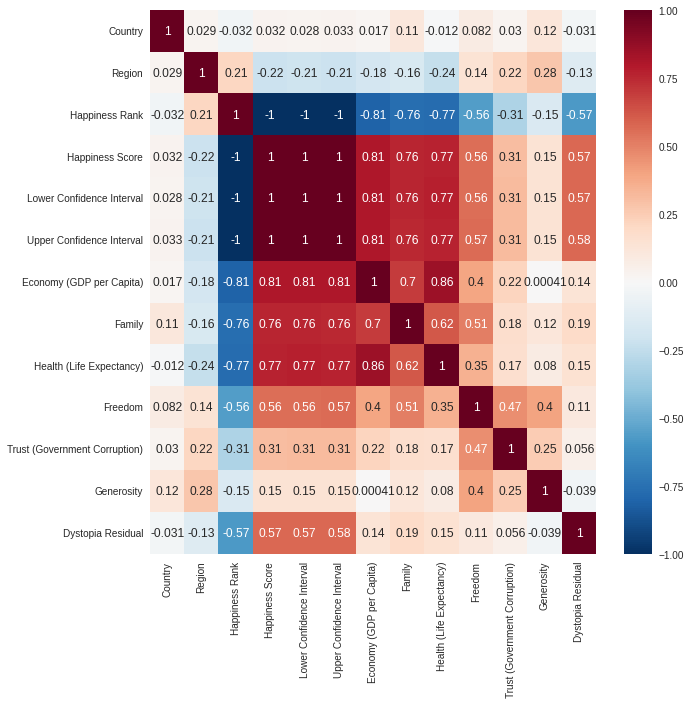

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(corr2015, cmap='RdBu_r', annot=True, vmax=1, vmin=-1) #corr2015 = data2015.corr() as calculated previously
plt.show()

plt.figure(figsize=(10,10))
sns.heatmap(corr2016, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

plt.figure(figsize=(10,10))
sns.heatmap(corr2017, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

# **ENCODING**

We encode the atributes with string values in our data before feeding it into our model to make sure that no issues are faced during computation. A lot of machine learning algorithms can only compute numeric data, which is why this step is necessary.

In [45]:
def ordinal_encoder2015(data2015, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(data2015[feat].nunique()))
        feat_key = list(data2015[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        data2015[feat] = data2015[feat].map(feat_dict)
    return data2015

def ordinal_encoder2017(data2017, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(data2017[feat].nunique()))
        feat_key = list(data2017[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        data2017[feat] = data2017[feat].map(feat_dict)
    return data2017

def ordinal_encoder2016(data2016, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(data2016[feat].nunique()))
        feat_key = list(data2016[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        data2016[feat] = data2016[feat].map(feat_dict)
    return data2016

In [53]:
data2015 = ordinal_encoder2015(data2015, data2015.drop(['Happiness Rank'], axis=1).columns)
data2016 = ordinal_encoder2016(data2016, data2016.drop(['Happiness Rank'], axis=1).columns)
data2017 = ordinal_encoder2017(data2017, data2017.drop(['Happiness.Rank'], axis=1).columns)
print(data2015.shape)
print(data2016.shape)
print(data2017.shape)

(158, 12)
(157, 13)
(155, 12)


As we can see below, a numeric value has been assigned to the values in both 'Country' and 'Region' for data2015.

In [54]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,136,10,1,157,20,152,155,149,157,151,116,126
1,59,10,2,156,101,137,158,151,144,99,145,135
2,38,10,3,155,17,140,156,129,152,154,130,123
3,106,10,4,154,51,154,153,133,158,144,133,119
4,25,6,5,153,27,141,152,141,146,142,146,117


# MODEL BUILDING

We'll be using the XGBoost Regressor as it is one of the most accurate modelling techniques for strucutred data.

In [57]:
data2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [65]:
x2015 = data2015.drop(['Happiness Rank'], axis=1)
y2015 = data2015['Happiness Rank']

x2017 = data2017.drop(['Happiness.Rank'], axis=1)
y2017 = data2017['Happiness.Rank']

x2016 = data2016.drop(['Happiness Rank'], axis=1)
y2016 = data2016['Happiness Rank']


x2015_train, x2015_test, y2015_train,y2015_test = train_test_split(x2015,y2015)
x2017_train, x2017_test, y2017_train,y2017_test = train_test_split(x2017,y2017)
x2016_train, x2016_test, y2016_train,y2016_test = train_test_split(x2016,y2016)

In [90]:
from xgboost import XGBRegressor

my_model2015 = XGBRegressor(n_estimators=50,learning_rate=0.08)
my_model2016 = XGBRegressor(n_estimators=50,learning_rate=0.08)
my_model2017 = XGBRegressor(n_estimators=50,learning_rate=0.08)

my_model2015.fit(x2015_train, y2015_train, early_stopping_rounds=50, eval_set=[(x2015_test, y2015_test)],verbose=False)
my_model2017.fit(x2017_train, y2017_train, early_stopping_rounds=50, eval_set=[(x2017_test, y2017_test)],verbose=False)
my_model2016.fit(x2016_train, y2016_train, early_stopping_rounds=50, eval_set=[(x2016_test, y2016_test)],verbose=False)

[14:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, n_estimators=50)

In [116]:
from sklearn.metrics import mean_absolute_error

predictions2015 = my_model2015.predict(x2015_test)
predictions2017 = my_model2017.predict(x2017_test)
predictions2016 = my_model2016.predict(x2016_test)

predictions_frame = [['2015', predictions2015,my_model2015.score(x2015_test, y2015_test)], 
                     ['2017', predictions2017,my_model2017.score(x2017_test, y2017_test)], 
                     ['2016', predictions2016,my_model2016.score(x2016_test, y2016_test)]]

model_values_yearly = pd.DataFrame(predictions_frame, columns=['Year', 'Prediction through XGBoost','Modelscore'])

model_values_yearly

,Year,Prediction through XGBoost,Modelscore
0,2015,"[74.02863, 76.75974, 69.451256, 60.859898, 7.1...",0.997008
1,2017,"[47.10392, 123.990746, 81.17418, 66.877815, 35...",0.996641
2,2016,"[128.91934, 4.1062164, 59.80878, 137.1424, 21....",0.996081


Error Calculation:

In [117]:
print("Mean Absolute Error for 2015: " + str(mean_absolute_error(predictions2015, y2015_test)))
print("Mean Absolute Error for 2016: " + str(mean_absolute_error(predictions2016, y2016_test)))
print("Mean Absolute Error for 2017: " + str(mean_absolute_error(predictions2017, y2017_test)))

Mean Absolute Error for 2015: 1.9991345226764679
Mean Absolute Error for 2016: 2.3459450960159303
Mean Absolute Error for 2017: 2.1497514125628348
